In [ ]:
!pip install pandas h2o matplotlib scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 37 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=e503fa22cb2e703a0b02c9100b0704c161222346f45fb300c5e993b8b76c508e
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,39 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_iz1c4w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving train-2years.csv to train-2years.csv


In [ ]:
df = pd.read_csv('train-2years.csv',index_col=0)

df.head()

,Starting minute (inclussive),Ending minute (exclussive),Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
Hour,,,,,,,,,,,,,
0,0,5,0,0,0,0,0,0,0,0,0,0,0
0,5,10,0,0,0,0,0,0,0,0,0,0,0
0,10,15,0,5,2,1028,109,1,11,79,0,0,0
0,15,20,0,5,2,1028,109,0,4,80,0,0,0
0,20,25,0,5,2,1028,113,0,3,80,0,0,0


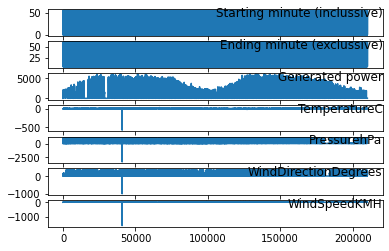

In [ ]:
# specify columns to plot
values = df.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [ ]:
df2 = df.copy()
num_lags = 3 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'wnd_dir':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('Generated power') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df_processed = df2[df2.columns[mask]]

# the columns in the processed dataframe
df_processed.columns

Index(['Generated power', 'Starting minute (inclussive)_lag1',
       'Starting minute (inclussive)_avg_window_length2',
       'Starting minute (inclussive)_lag2',
       'Starting minute (inclussive)_avg_window_length3',
       'Starting minute (inclussive)_lag3',
       'Starting minute (inclussive)_avg_window_length4',
       'Ending minute (exclussive)_lag1',
       'Ending minute (exclussive)_avg_window_length2',
       'Ending minute (exclussive)_lag2',
       'Ending minute (exclussive)_avg_window_length3',
       'Ending minute (exclussive)_lag3',
       'Ending minute (exclussive)_avg_window_length4', 'Generated power_lag1',
       'Generated power_avg_window_length2', 'Generated power_lag2',
       'Generated power_avg_window_length3', 'Generated power_lag3',
       'Generated power_avg_window_length4', 'TemperatureC_lag1',
       'TemperatureC_avg_window_length2', 'TemperatureC_lag2',
       'TemperatureC_avg_window_length3', 'TemperatureC_lag3',
       'TemperatureC_avg_wi

In [ ]:
mask = df_processed.columns.str.contains('Generated power')
df_processed[df_processed.columns[mask]].head(10)

,Generated power,Generated power_lag1,Generated power_avg_window_length2,Generated power_lag2,Generated power_avg_window_length3,Generated power_lag3,Generated power_avg_window_length4
Hour,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving competition-3.csv to competition-3.csv


In [ ]:
df1 = pd.read_csv('competition-3.csv',index_col=0)

df1.head()

,Starting minute (inclussive),Ending minute (exclussive),Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
Hour,,,,,,,,,,,,,
0,0,5,0,0,0,0,0,0,0,0,0,0,0
0,5,10,0,0,0,0,0,0,0,0,0,0,0
0,10,15,0,8,4,1030,134,6,6,76,0,0,0
0,15,20,0,8,4,1030,137,4,8,76,0,0,0
0,20,25,0,8,4,1030,137,1,8,76,0,0,0


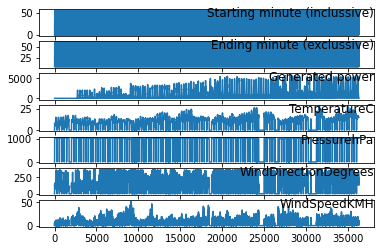

In [ ]:
# specify columns to plot
values = df1.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [ ]:
df2 = df1.copy()
num_lags = 3 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'wnd_dir':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('Generated power') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df1_processed = df2[df2.columns[mask]]

# the columns in the processed dataframe
df1_processed.columns

Index(['Generated power', 'Starting minute (inclussive)_lag1',
       'Starting minute (inclussive)_avg_window_length2',
       'Starting minute (inclussive)_lag2',
       'Starting minute (inclussive)_avg_window_length3',
       'Starting minute (inclussive)_lag3',
       'Starting minute (inclussive)_avg_window_length4',
       'Ending minute (exclussive)_lag1',
       'Ending minute (exclussive)_avg_window_length2',
       'Ending minute (exclussive)_lag2',
       'Ending minute (exclussive)_avg_window_length3',
       'Ending minute (exclussive)_lag3',
       'Ending minute (exclussive)_avg_window_length4', 'Generated power_lag1',
       'Generated power_avg_window_length2', 'Generated power_lag2',
       'Generated power_avg_window_length3', 'Generated power_lag3',
       'Generated power_avg_window_length4', 'TemperatureC_lag1',
       'TemperatureC_avg_window_length2', 'TemperatureC_lag2',
       'TemperatureC_avg_window_length3', 'TemperatureC_lag3',
       'TemperatureC_avg_wi

In [ ]:
#df_processed.reset_index(drop=True,inplace=True)
#df_train = df_processed.loc[:int(df_processed.shape[0]*0.896),:]
#df_test = df_processed.loc[int(df_processed.shape[0]*0.896):,:]
df_train = df_processed
df_test = df1_processed

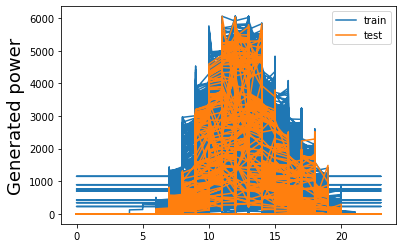

In [ ]:
plt.plot(df_train.index,df_train['Generated power'])
plt.plot(df_test.index,df_test['Generated power'])
plt.ylabel('Generated power',fontsize=18)
plt.legend(['train','test'])
plt.show()

In [ ]:
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y = 'Generated power'
X = hf_train.columns
X.remove(y)

In [ ]:
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_2_20220708_142211

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 29651.376089117784
RMSE: 172.1957493352196
MAE: 59.2765171286999
RMSLE: NaN
R^2: 0.9822094217659281
Mean Residual Deviance: 29651.376089117784
Null degrees of freedom: 9951
Residual degrees of freedom: 9945
Null deviance: 16586914093.172222
Residual deviance: 295090494.8389002
AIC: 130736.9220463023

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 44467.656121697655
RMSE: 210.87355481827885
MAE: 67.8154886423133
RMSLE: NaN
R^2: 0.9736243283012519
Mean Residual Deviance: 44467.656121697655
Null degrees of freedom: 21135
Residual degrees of freedom: 21129
Null deviance: 35633944759.4154
Residual deviance: 939868379.7882017


In [ ]:
leader_model = aml.leader

In [ ]:
hf_test_predict = leader_model.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
hf_test_predict.head()

predict
0.483022
0.238585
0.241396
0.244732
0.238023
0.241298
0.237242
0.228704
0.337884
0.329557


In [ ]:
hf_test

Generated power,Starting minute (inclussive)_lag1,Starting minute (inclussive)_avg_window_length2,Starting minute (inclussive)_lag2,Starting minute (inclussive)_avg_window_length3,Starting minute (inclussive)_lag3,Starting minute (inclussive)_avg_window_length4,Ending minute (exclussive)_lag1,Ending minute (exclussive)_avg_window_length2,Ending minute (exclussive)_lag2,Ending minute (exclussive)_avg_window_length3,Ending minute (exclussive)_lag3,Ending minute (exclussive)_avg_window_length4,Generated power_lag1,Generated power_avg_window_length2,Generated power_lag2,Generated power_avg_window_length3,Generated power_lag3,Generated power_avg_window_length4,TemperatureC_lag1,TemperatureC_avg_window_length2,TemperatureC_lag2,TemperatureC_avg_window_length3,TemperatureC_lag3,TemperatureC_avg_window_length4,DewpointC_lag1,DewpointC_avg_window_length2,DewpointC_lag2,DewpointC_avg_window_length3,DewpointC_lag3,DewpointC_avg_window_length4,PressurehPa_lag1,PressurehPa_avg_window_length2,PressurehPa_lag2,PressurehPa_avg_window_length3,PressurehPa_lag3,PressurehPa_avg_window_length4,WindDirectionDegrees_lag1,WindDirectionDegrees_avg_window_length2,WindDirectionDegrees_lag2,WindDirectionDegrees_avg_window_length3,WindDirectionDegrees_lag3,WindDirectionDegrees_avg_window_length4,WindSpeedKMH_lag1,WindSpeedKMH_avg_window_length2,WindSpeedKMH_lag2,WindSpeedKMH_avg_window_length3,WindSpeedKMH_lag3,WindSpeedKMH_avg_window_length4,WindSpeedGustKMH_lag1,WindSpeedGustKMH_avg_window_length2,WindSpeedGustKMH_lag2,WindSpeedGustKMH_avg_window_length3,WindSpeedGustKMH_lag3,WindSpeedGustKMH_avg_window_length4,Humidity_lag1,Humidity_avg_window_length2,Humidity_lag2,Humidity_avg_window_length3,Humidity_lag3,Humidity_avg_window_length4,HourlyPrecipMM_lag1,HourlyPrecipMM_avg_window_length2,HourlyPrecipMM_lag2,HourlyPrecipMM_avg_window_length3,HourlyPrecipMM_lag3,HourlyPrecipMM_avg_window_length4,dailyrainMM_lag1,dailyrainMM_avg_window_length2,dailyrainMM_lag2,dailyrainMM_avg_window_length3,dailyrainMM_lag3,dailyrainMM_avg_window_length4,SolarRadiationWatts_m2_lag1,SolarRadiationWatts_m2_avg_window_length2,SolarRadiationWatts_m2_lag2,SolarRadiationWatts_m2_avg_window_length3,SolarRadiationWatts_m2_lag3,SolarRadiationWatts_m2_avg_window_length4
0,5,7.5,10,10,15,12.5,10,12.5,15,15,20,17.5,0,0,0,0,0,0,0,4,8,5.33333,8,6,0,2,4,2.66667,4,3,0,515,1030,686.667,1030,772.5,0,67,134,90.3333,137,102,0,3,6,3.33333,4,2.75,0,3,6,4.66667,8,5.5,0,38,76,50.6667,76,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,10,12.5,15,15,20,17.5,15,17.5,20,20,25,22.5,0,0,0,0,0,0,8,8,8,8,8,8,4,4,4,4,4,4,1030,1030,1030,1030,1030,1030,134,135.5,137,136,137,136.25,6,5,4,3.66667,1,3.75,6,7,8,7.33333,8,6.5,76,76,76,76,76,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,15,17.5,20,20,25,22.5,20,22.5,25,25,30,27.5,0,0,0,0,0,0,8,8,8,8,8,8,4,4,4,4,4,4,1030,1030,1030,1030,1030,1030,137,137,137,137,137,137,4,2.5,1,3,4,3.25,8,8,8,6.66667,4,6.5,76,76,76,76,76,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,20,22.5,25,25,30,27.5,25,27.5,30,30,35,32.5,0,0,0,0,0,0,8,8,8,8,8,8,4,4,4,4,4,4,1030,1030,1030,1030,1030,1030,137,137,137,137,137,137,1,2.5,4,3,4,3,8,6,4,6,6,6,76,76,76,76,76,76.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,25,27.5,30,30,35,32.5,30,32.5,35,35,40,37.5,0,0,0,0,0,0,8,8,8,8,8,8,4,4,4,4,4,4,1030,1030,1030,1030,1030,1030,137,137,137,137,137,137,4,4,4,3.66667,3,3.75,4,5,6,5.33333,6,5.5,76,76,76,76.6667,78,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,30,32.5,35,35,40,37.5,35,37.5,40,40,45,42.5,0,0,0,0,0,0,8,8,8,8,8,8,4,4,4,4,4,4,1030,1030,1030,1030,1030,1030,137,137,137,137,137,135.75,4,3.5,3,3.66667,4,3.75,6,6,6,6,6,6,76,77,78,77.3333,78,77.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,35,37.5,40,40,45,42.5,40,42.5,45,45,50,47.5,0,0,0,0,0,0,8,8,8,8,8,8,4,4,4,4,4,4,1030,1030,1030,1030,1030,1030,137,137,137,135.333,132,134.5,3,3.5,4,3.66667,4,3.75,6,6,6,6,6,6,78,78,78,78,78,78.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,40,42.5,45,45,50,47.5,45,47.5,50,50,55,52.5,0,0,0,0,0,0,8,8,8,8,8,8,4,4,4,4,4,4.25,1030,1030,1030,1030,1030,1030

In [ ]:
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Generated power'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

,ground_truth,predictions
0,0,0.483022
1,0,0.238585
2,0,0.241396
3,0,0.244732
4,0,0.238023


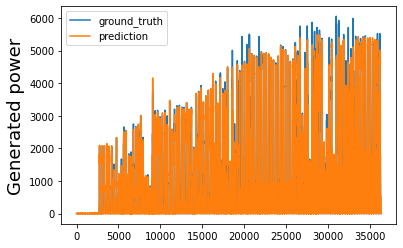

In [ ]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('Generated power',fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.show()

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving week-avg2.csv to week-avg2.csv


In [ ]:
df1 = pd.read_csv('week-avg2.csv',index_col=0)

df1.head()

,Starting minute (inclussive),Ending minute (exclussive),Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
Hour,,,,,,,,,,,,,
0,0,5,0.0,10.0,6.5,1018.0,330.0,0.5,1.5,81.0,0.0,15.5,0.0
0,5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10,15,0.0,9.5,6.5,1018.0,327.5,1.5,3.0,80.5,0.0,0.0,0.0
0,15,20,0.0,9.5,6.5,1018.0,161.5,1.5,4.0,81.0,0.0,0.0,0.0
0,20,25,0.0,9.5,6.5,1018.0,161.5,0.0,2.0,81.5,0.0,0.0,0.0


In [ ]:
df2 = df1.copy()
num_lags = 3 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'wnd_dir':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('Generated power') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df2_processed = df2[df2.columns[mask]]

# the columns in the processed dataframe
df2_processed.columns

Index(['Generated power', 'Starting minute (inclussive)_lag1',
       'Starting minute (inclussive)_avg_window_length2',
       'Starting minute (inclussive)_lag2',
       'Starting minute (inclussive)_avg_window_length3',
       'Starting minute (inclussive)_lag3',
       'Starting minute (inclussive)_avg_window_length4',
       'Ending minute (exclussive)_lag1',
       'Ending minute (exclussive)_avg_window_length2',
       'Ending minute (exclussive)_lag2',
       'Ending minute (exclussive)_avg_window_length3',
       'Ending minute (exclussive)_lag3',
       'Ending minute (exclussive)_avg_window_length4', 'Generated power_lag1',
       'Generated power_avg_window_length2', 'Generated power_lag2',
       'Generated power_avg_window_length3', 'Generated power_lag3',
       'Generated power_avg_window_length4', 'TemperatureC_lag1',
       'TemperatureC_avg_window_length2', 'TemperatureC_lag2',
       'TemperatureC_avg_window_length3', 'TemperatureC_lag3',
       'TemperatureC_avg_wi

In [ ]:
hf_result = h2o.H2OFrame(df2_processed)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
leader_model = aml.leader

In [ ]:
hf_test_predict = leader_model.predict(hf_result)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
hf_test_predict.head(2016)

predict
0.518565
-0.0457762
0.27269
0.276638
0.284991
0.291138
0.305525
-0.102627
0.0805344
1.01232
